
# **Wisconsin Breast Cancer Prediction**
#### Project Overview: The purpose of this project is to utilize machine learning models to predict whether the cancer is benign or malignant, based on various information of patients. 
#### Link to original data source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### **Import the data and useful libraries**

In [1]:
#%%capture
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from wordcloud import STOPWORDS, WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [26]:
# import the dataset
df = pd.read_csv('data.csv')

# view the dataset's shape
print("The dataset contains {} rows of patients' records, and {} columns/variables".format(df.shape[0], df.shape[1]))

The dataset contains 569 rows of patients' records, and 33 columns/variables


In [27]:
# examine the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [29]:
# inspect whether class imbalance exists
print("Among all {} available records, there are {} benign cases and {} malignant cases".format(df.shape[0], df[df['diagnosis']=='B'].shape[0], df[df['diagnosis']=='M'].shape[0]))

Among all 569 available records, there are 357 benign cases and 212 malignant cases


In [30]:
# drop the obviously-useless column id
df = df.drop(columns='id')

In [31]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [32]:
# check for nulls
print(df.isnull().sum())

# since "Unnamed: 32" column is NaN for every row, we drop this column
df = df.drop(columns='Unnamed: 32')

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [33]:
# view the statistics of all continuous variables
df.describe()
# note: we notice the value range of each variable differs a lot. Might lead to the need of data scaling

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


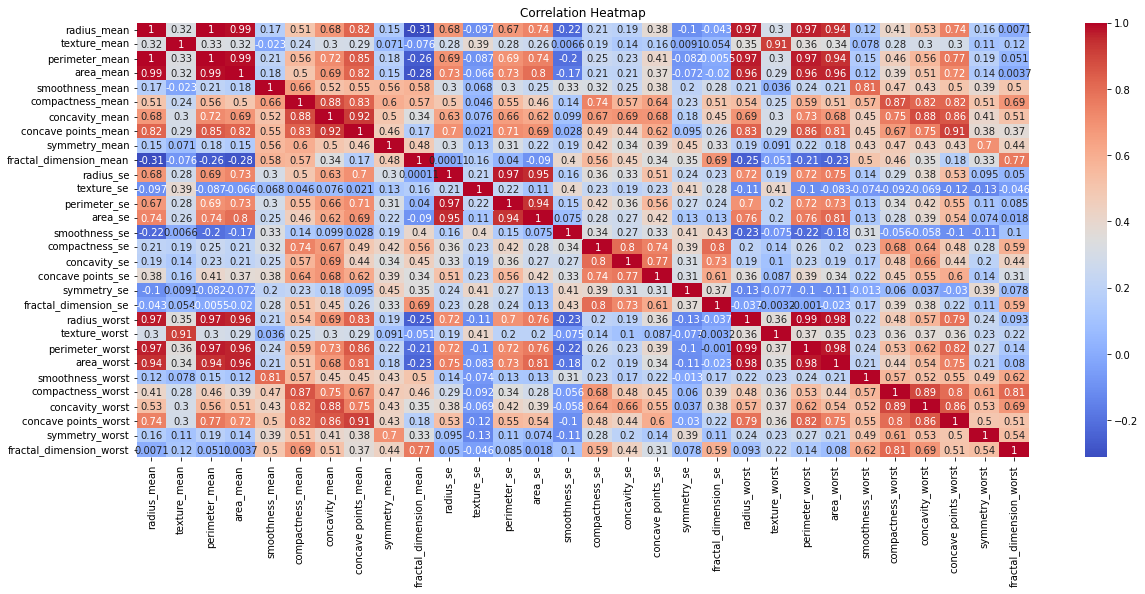

In [35]:
# visualize the correlation between columns
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The above heatmap shows these variables are highly correlated with each other:
- perimeter_mean and radius_mean
- area_mean and radius_mean
- radius_worst and radius_mean
- perimeter_worst and radius_mean
- area_worst and radius_mean
- texture_worst and texture_mean
- concave points_mean and concave points_worst
- concave points_mean and concavity_mean
- compactness_mean and compactness_worst
- concavity_worst and comppactness_mean

In [54]:
df_final = df.drop(columns=['perimeter_mean', 'area_mean', 'radius_mean', 'perimeter_worst', 'area_worst', 'texture_worst', 'concave points_worst','concavity_mean','compactness_worst','concavity_worst'])

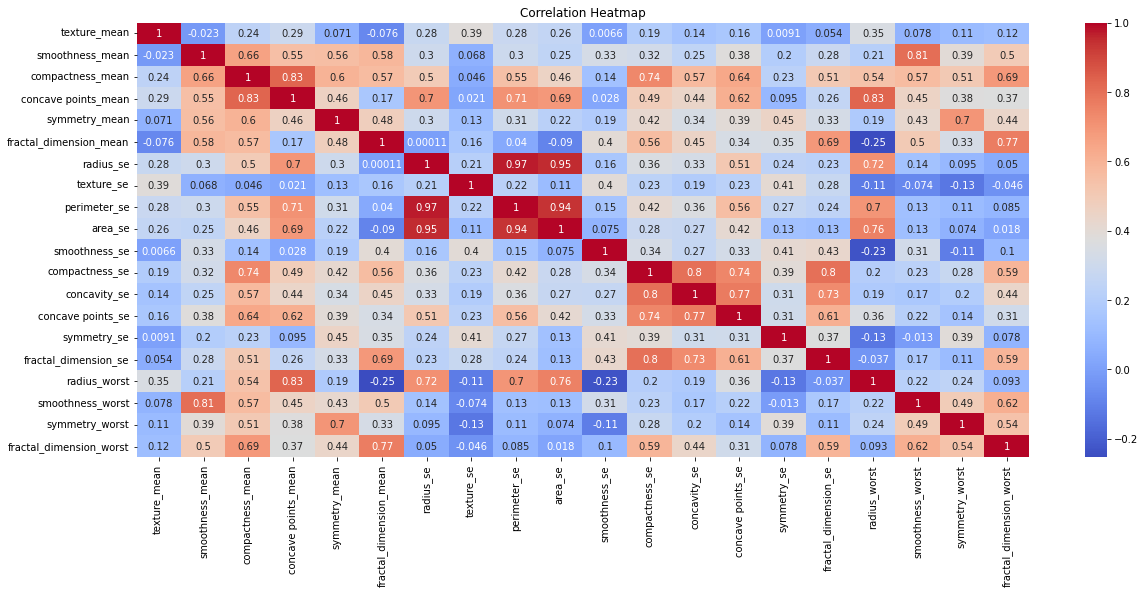

In [48]:
plt.figure(figsize = (20,8))
sns.heatmap(df_final.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [56]:
# build the training set
X = df_final[df_final.loc[:, df_final.columns!='diagnosis'].columns]
Y = df_final['diagnosis']
     
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)
print("The training dataset contains {} columns and {} rows.".format(X_train.shape[1], X_train.shape[0]))

The training dataset contains 20 columns and 512 rows.


In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model
lr_clf = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.7, max_iter=100000).fit(X_train, Y_train)

print("The training accuracy is {}".format(lr_clf.score(X_train, Y_train)))

The training accuracy is 0.873046875


Confusion Matrix



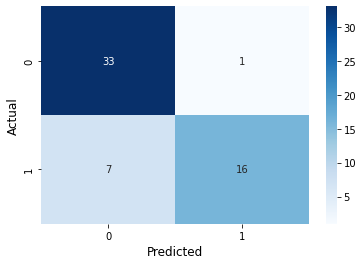


Classification Metrics

              precision    recall  f1-score   support

           B       0.82      0.97      0.89        34
           M       0.94      0.70      0.80        23

    accuracy                           0.86        57
   macro avg       0.88      0.83      0.85        57
weighted avg       0.87      0.86      0.85        57



In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = lr_clf.predict(X_test)

# Calculate and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix\n")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
lr_report = classification_report(Y_test, y_pred)

print("\nClassification Metrics\n")
print(lr_report)

#### **PCA**

Explained variances in percentage:
[39.17583194 17.13426913 12.04507741  6.88891421  6.1056375   5.52167424
  3.04310413  2.32323842  1.58502314  1.40070247  1.2122655   0.86945414
  0.77553348  0.6581166   0.31790038  0.28867636  0.22164949  0.19690424
  0.14520724  0.09081998]



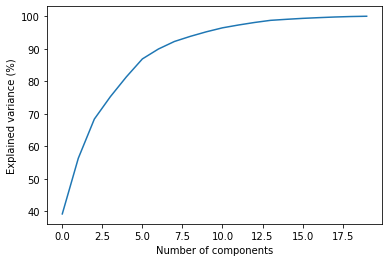

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply standardization
ss = StandardScaler().fit(X_train)
x_train_ss = ss.transform(X_train)
x_test_ss = ss.transform(X_test)

# Apply PCA
pca = PCA().fit(x_train_ss)
x_train_pca = pca.transform(x_train_ss)
x_test_pca = pca.transform(x_test_ss)

# Print explained variances in percentage
print("Explained variances in percentage:")
print(pca.explained_variance_ratio_*100)
print()

# Plot cumulative explained
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [62]:
# Rerun PCA with 12 components
pca = PCA(n_components=12).fit(x_train_ss)
x_train_pca = pca.transform(x_train_ss)
x_test_pca = pca.transform(x_test_ss)

In [65]:
# Fit a logistic regression model
lr_clf_pca = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.7, max_iter=100000).fit(x_train_pca, Y_train)

print("The training accuracy is {}".format(lr_clf_pca.score(x_train_pca, Y_train)))

The training accuracy is 0.97265625


Confusion Matrix



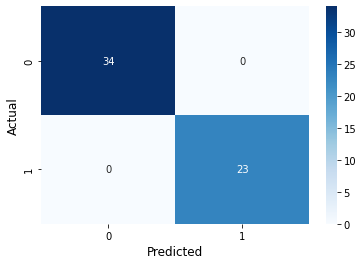


Classification Metrics

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        34
           M       1.00      1.00      1.00        23

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [66]:
y_pred_pca = lr_clf_pca.predict(x_test_pca)

# Calculate and plot confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred_pca)

print("Confusion Matrix\n")
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
lr_pca_report = classification_report(Y_test, y_pred_pca)

print("\nClassification Metrics\n")
print(lr_pca_report)